In [1]:
#install.packages("transformr")
library(readxl)
library(tidyverse)
library(transformr)
library(gganimate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
global.data <- read_excel("data.xlsx")
global.data.long <- global.data %>%
                    group_by(geoId) %>%
                    arrange(geoId, year, month, day) %>%
                    mutate(cumCases=cumsum(cases), 
                           cumDeaths=cumsum(deaths), 
                           smaCases=(cases+lag(cases, 1)+lag(cases, 2)+lag(cases, 3)+lag(cases, 4))/5, 
                           smaDeaths=(deaths+lag(deaths, 1)+lag(deaths, 2)+lag(deaths, 3)+lag(deaths, 4))/5) # %>%

In [3]:
plot.data <- global.data.long
#plot.data <- plot.data%>% mutate(jCumCases=1)
#plot.data <- plot.data%>% mutate(jCumCases=cumCases + (row_number()-1)* 0.00000001)
#plot.data <- plot.data%>% mutate(jSmaCases=smaCases + (row_number()-1)* 0.00000001)
plot.data <- plot.data%>% filter(geoId=="CA"|geoId=="DE"|geoId=="CN"|geoId=="UK"|geoId=="FR"|geoId=="ES"|geoId=="IT"|geoId=="KR"|geoId=="US"|geoId=="JP")

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 40 row(s) containing missing values (geom_path).”


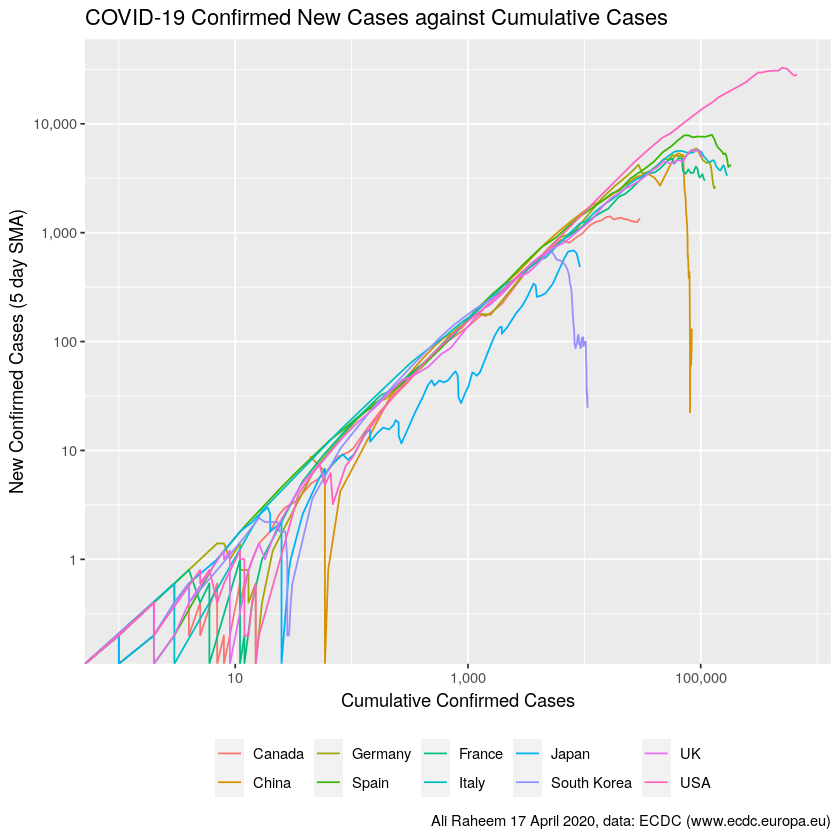

In [4]:
p <- ggplot(plot.data, aes(x=cumCases, xmin=1, ymin=1)) +
    geom_line(aes(y=smaCases, colour=geoId)) +
    theme(legend.position="bottom") +
    scale_y_log10(labels = scales::label_comma(accuracy=1)) +
    scale_x_log10(labels = scales::comma) +
    labs(x="Cumulative Confirmed Cases", 
         y="New Confirmed Cases (5 day SMA)", 
         title="COVID-19 Confirmed New Cases against Cumulative Cases",
         #subtitle="27th of March 2020",
         caption="Ali Raheem 17 April 2020, data: ECDC (www.ecdc.europa.eu)") + 
    scale_colour_discrete(name="", labels=c("CA"="Canada","CN"="China", "DE"="Germany", "UK"="UK", "FR"="France", "ES"="Spain", "IT"="Italy", "KR"="South Korea", "US"="USA", "JP"="Japan"))
p

In [5]:
ggsave('COVID-19_loglog.png')

Saving 6.67 x 6.67 in image

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 40 row(s) containing missing values (geom_path).”


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 40 row(s) containing missing values (geom_path).”


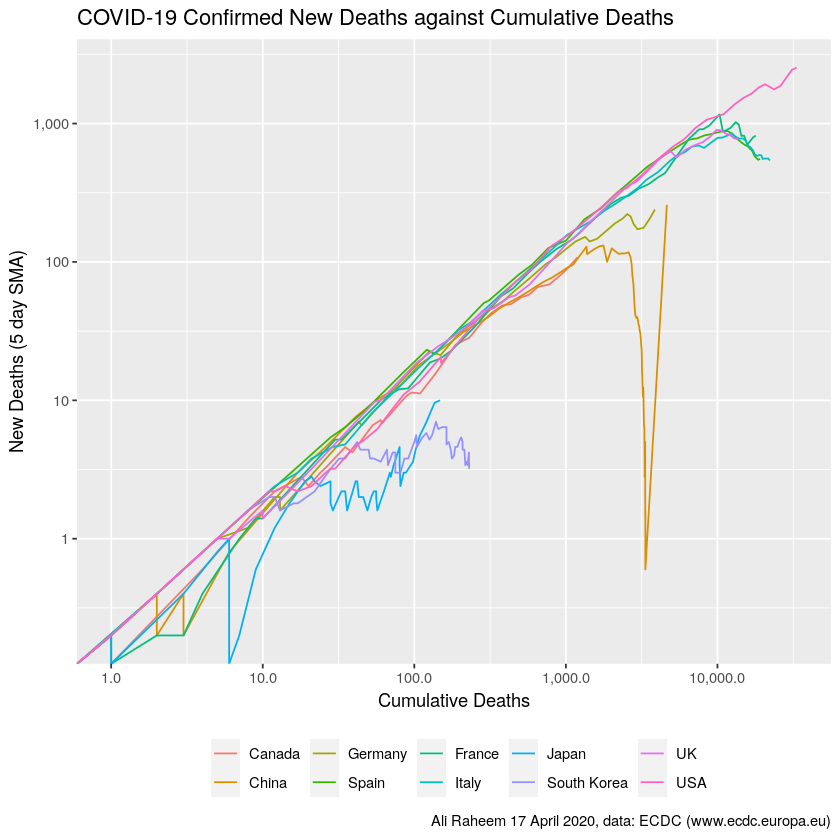

In [6]:
p <- ggplot(plot.data, aes(x=cumDeaths, xmin=1, ymin=1)) +
    geom_line(aes(y=smaDeaths, colour=geoId)) +
    theme(legend.position="bottom") +
    scale_y_log10(labels = scales::label_comma(accuracy=1)) +
    scale_x_log10(labels = scales::comma) +
    labs(x="Cumulative Deaths", 
         y="New Deaths (5 day SMA)", 
         title="COVID-19 Confirmed New Deaths against Cumulative Deaths",
         #subtitle="27th of March 2020",
         caption="Ali Raheem 17 April 2020, data: ECDC (www.ecdc.europa.eu)") + 
    scale_colour_discrete(name="", labels=c("CA"="Canada","CN"="China", "DE"="Germany", "UK"="UK", "FR"="France", "ES"="Spain", "IT"="Italy", "KR"="South Korea", "US"="USA", "JP"="Japan"))
p

In [7]:
ggsave('COVID-19_loglog_deaths.png')

Saving 6.67 x 6.67 in image

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 40 row(s) containing missing values (geom_path).”


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 40 row(s) containing missing values (geom_path).”


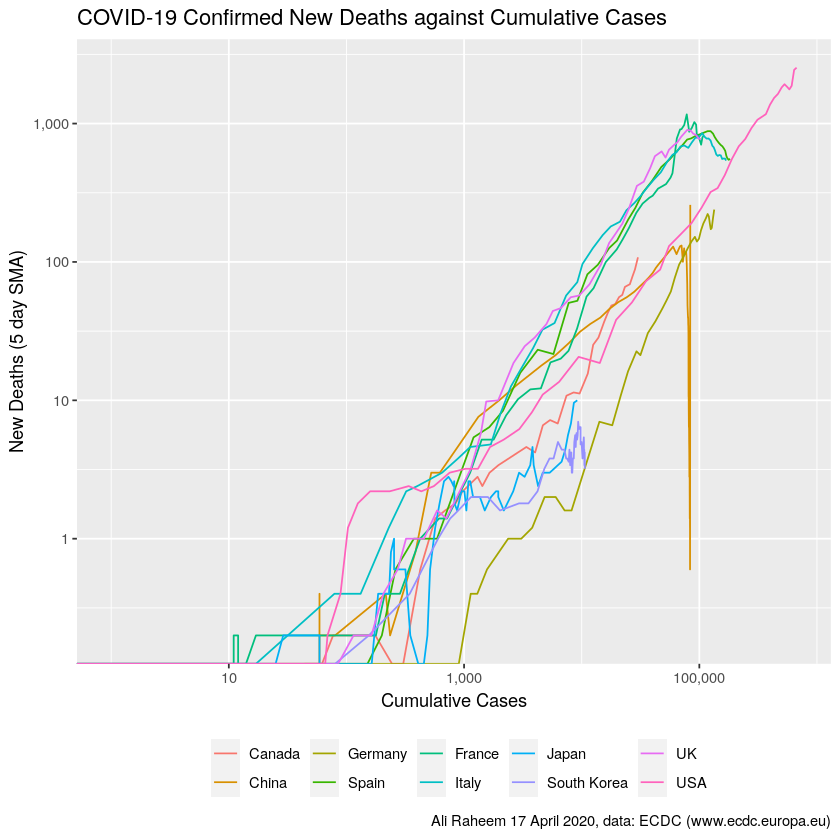

In [8]:
p <- ggplot(plot.data, aes(x=cumCases, xmin=1, ymin=1)) +
    geom_line(aes(y=smaDeaths, colour=geoId)) +
    theme(legend.position="bottom") +
    scale_y_log10(labels = scales::label_comma(accuracy=1)) +
    scale_x_log10(labels = scales::comma) +
    labs(x="Cumulative Cases", 
         y="New Deaths (5 day SMA)", 
         title="COVID-19 Confirmed New Deaths against Cumulative Cases",
         #subtitle="27th of March 2020",
         caption="Ali Raheem 17 April 2020, data: ECDC (www.ecdc.europa.eu)") + 
    scale_colour_discrete(name="", labels=c("CA"="Canada","CN"="China", "DE"="Germany", "UK"="UK", "FR"="France", "ES"="Spain", "IT"="Italy", "KR"="South Korea", "US"="USA", "JP"="Japan"))
p

In [9]:
ggsave('COVID-19_loglog_deaths_cases.png')

Saving 6.67 x 6.67 in image

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 40 row(s) containing missing values (geom_path).”


In [10]:
japan.data <- plot.data %>% filter(geoId=="JP")
japan.data

dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,cumCases,cumDeaths,smaCases,smaDeaths
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019-12-31,31,12,2019,0,0,Japan,JP,JPN,126529100,0,0,NA,NA
2020-01-01,1,1,2020,0,0,Japan,JP,JPN,126529100,0,0,NA,NA
2020-01-02,2,1,2020,0,0,Japan,JP,JPN,126529100,0,0,NA,NA
2020-01-03,3,1,2020,0,0,Japan,JP,JPN,126529100,0,0,NA,NA
2020-01-04,4,1,2020,0,0,Japan,JP,JPN,126529100,0,0,0.0,0
2020-01-05,5,1,2020,0,0,Japan,JP,JPN,126529100,0,0,0.0,0
2020-01-06,6,1,2020,0,0,Japan,JP,JPN,126529100,0,0,0.0,0
2020-01-07,7,1,2020,0,0,Japan,JP,JPN,126529100,0,0,0.0,0
2020-01-08,8,1,2020,0,0,Japan,JP,JPN,126529100,0,0,0.0,0


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 4 row(s) containing missing values (geom_path).”


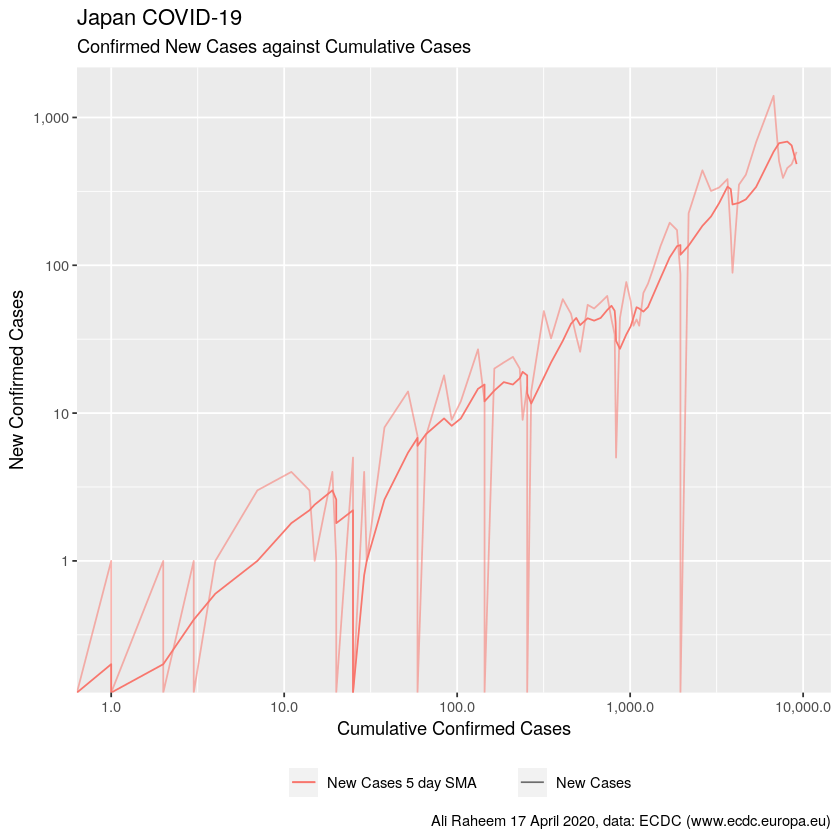

In [11]:
ggplot(japan.data, aes(x=cumCases, xmin=1, ymin=1)) +
    geom_line(aes(y=smaCases, colour=geoId)) +
    geom_line(aes(y=cases, colour=geoId, alpha=0.5)) +
    theme(legend.position="bottom") +
    scale_y_log10(labels = scales::label_comma(accuracy=1)) +
    scale_x_log10(labels = scales::comma) +
    labs(x="Cumulative Confirmed Cases", 
         y="New Confirmed Cases", 
         title="Japan COVID-19",
         subtitle="Confirmed New Cases against Cumulative Cases",
         #subtitle="27th of March 2020",
         caption="Ali Raheem 17 April 2020, data: ECDC (www.ecdc.europa.eu)") + 
    scale_colour_discrete(name="", labels=c("JP"="New Cases 5 day SMA")) +
    scale_alpha_continuous(name="", labels=c("New Cases"))
